In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
data = pd.read_csv('credit_risk_dataset.csv')

In [33]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:

# Checking for missing values
data.isnull().sum()

In [35]:
data['loan_int_rate']=data['loan_int_rate'].fillna(data['loan_int_rate'].mean())

data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].mean())


In [36]:
# Summary statistics
data.describe()



,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.085333,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


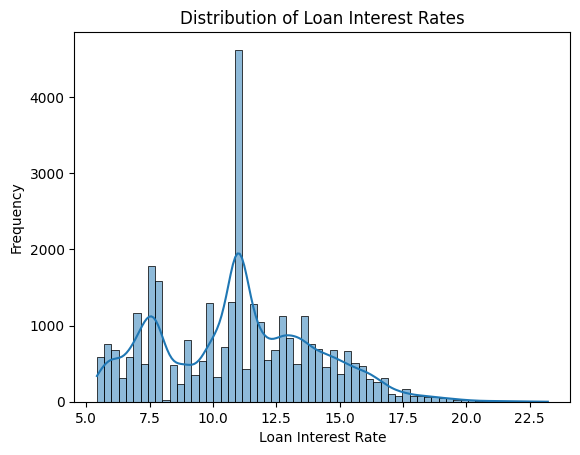

In [54]:
sns.histplot(data['loan_int_rate'], kde=True)
plt.title('Distribution of Loan Interest Rates')
plt.xlabel('Loan Interest Rate')
plt.ylabel('Frequency')
plt.show()


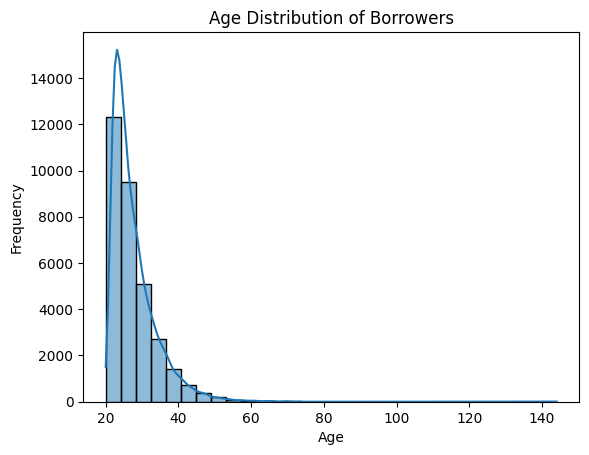

In [41]:
sns.histplot(data['person_age'], kde=True, bins=30)
plt.title('Age Distribution of Borrowers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


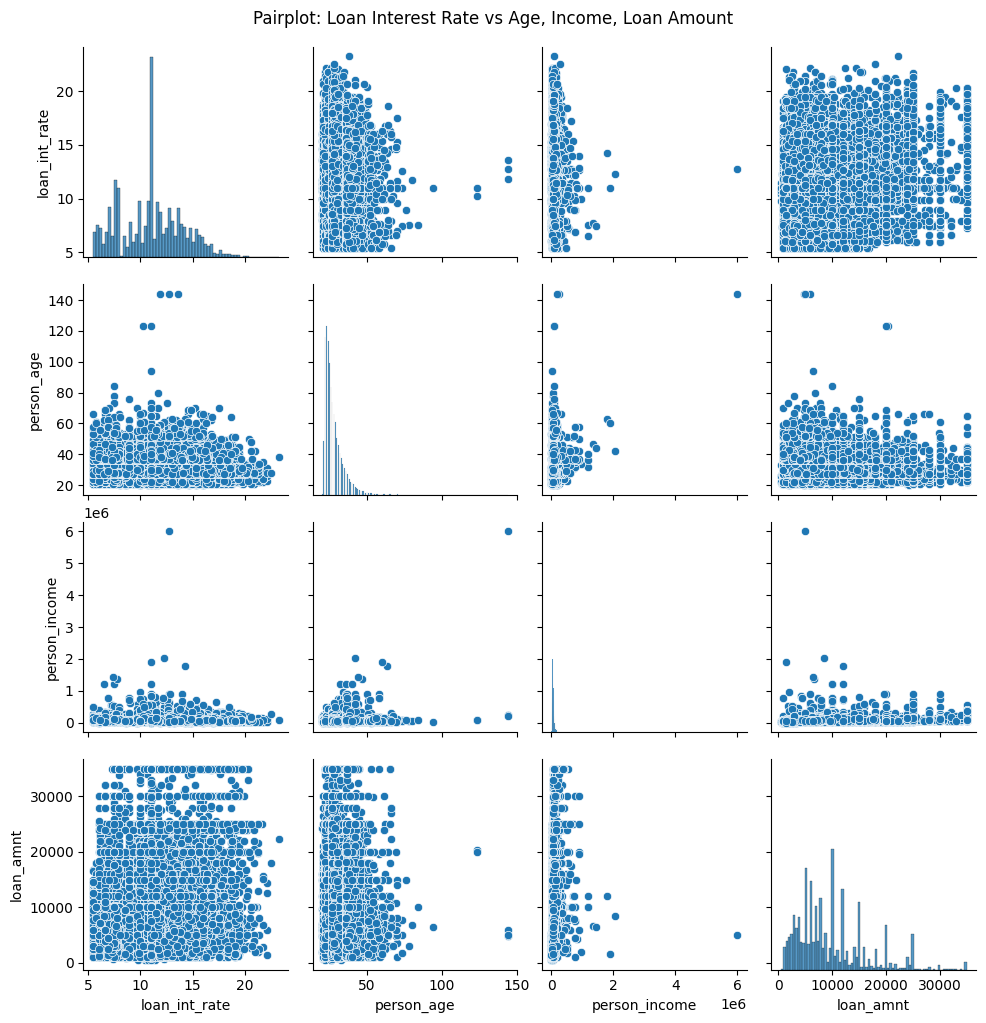

In [43]:
import seaborn as sns

# Pairplot of multiple features vs loan interest rate
sns.pairplot(data[['loan_int_rate', 'person_age', 'person_income', 'loan_amnt']])
plt.suptitle("Pairplot: Loan Interest Rate vs Age, Income, Loan Amount", y=1.02)
plt.show()


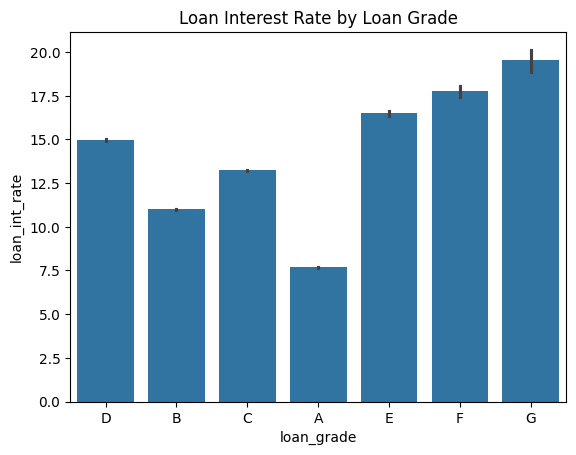

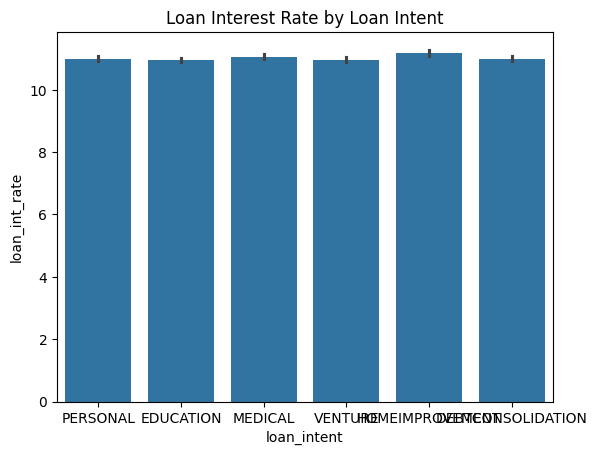

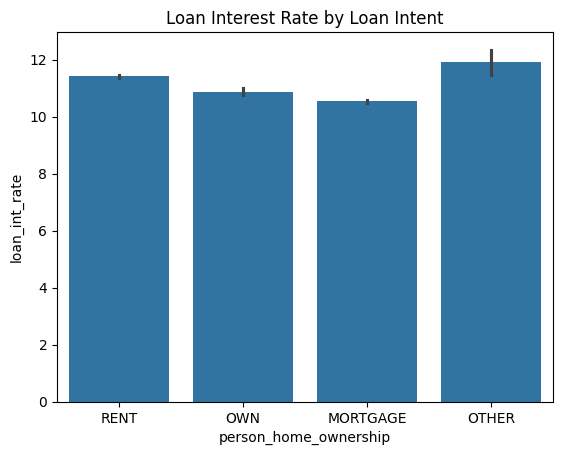

In [44]:
# Loan Grade vs Loan Interest Rate
sns.barplot(x='loan_grade', y='loan_int_rate', data=data)
plt.title('Loan Interest Rate by Loan Grade')
plt.show()

# Loan Intent vs Loan Interest Rate
sns.barplot(x='loan_intent', y='loan_int_rate', data=data)
plt.title('Loan Interest Rate by Loan Intent')
plt.show()


sns.barplot(x='person_home_ownership', y='loan_int_rate', data=data)
plt.title('Loan Interest Rate by Loan Intent')
plt.show()


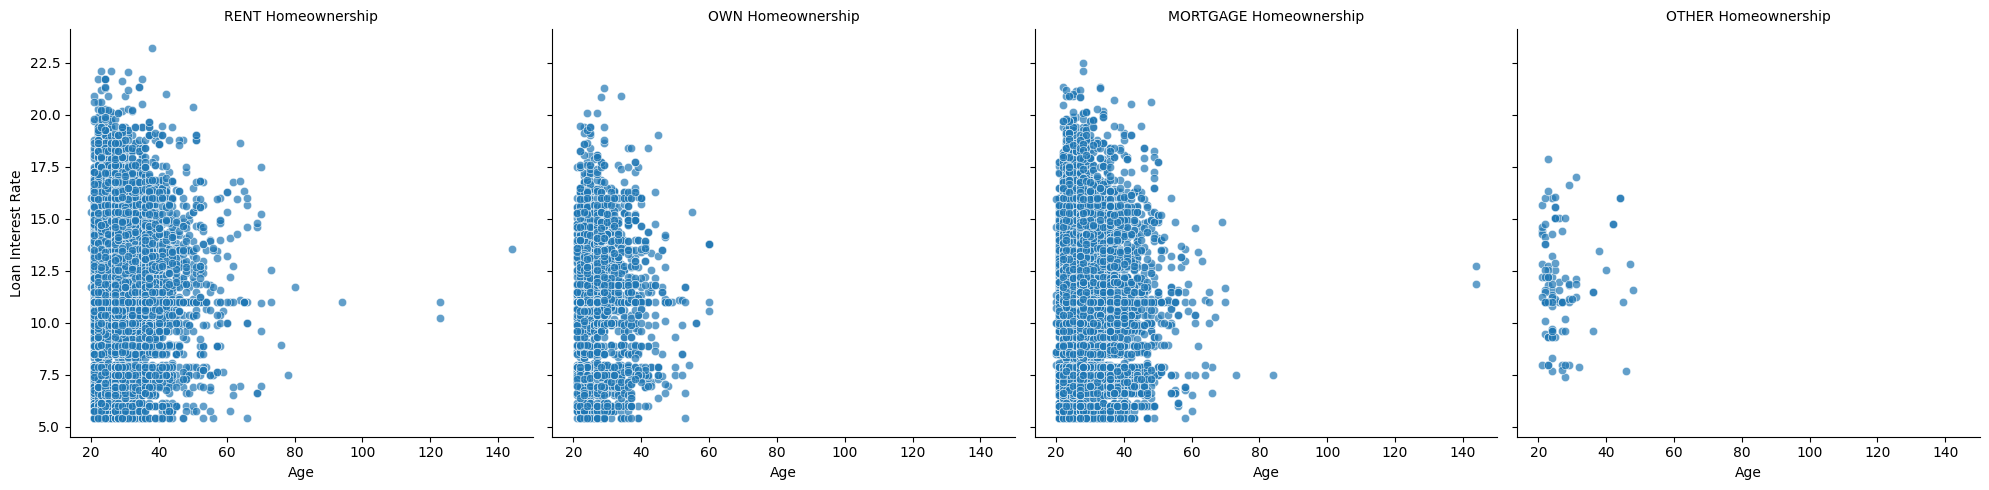

In [56]:
import seaborn as sns

g = sns.FacetGrid(data, col="person_home_ownership", height=5)
g.map(sns.scatterplot, 'person_age', 'loan_int_rate', alpha=.7, edgecolor='w')
g.set_axis_labels("Age", "Loan Interest Rate")
g.set_titles("{col_name} Homeownership")
plt.show()


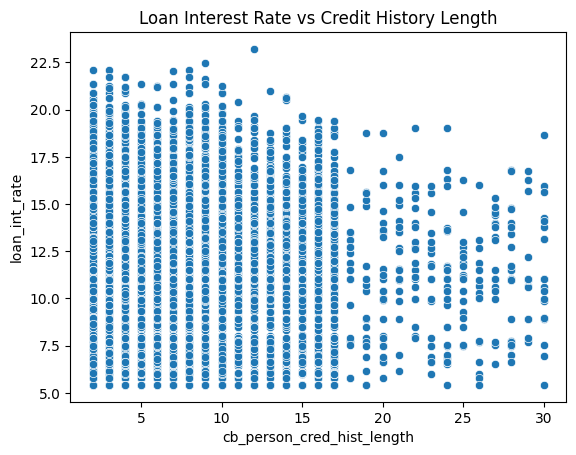

In [48]:
sns.scatterplot(x='cb_person_cred_hist_length', y='loan_int_rate', data=data)
plt.title('Loan Interest Rate vs Credit History Length')
plt.show()


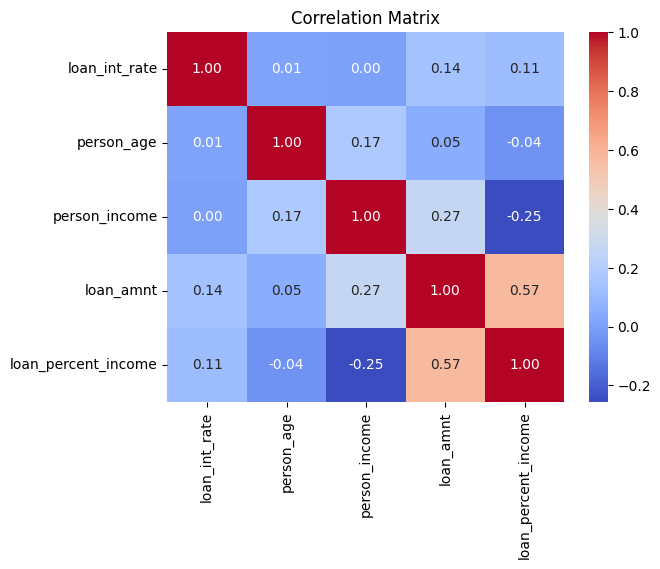

In [51]:
correlation_matrix = data[['loan_int_rate', 'person_age', 'person_income', 'loan_amnt', 'loan_percent_income']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


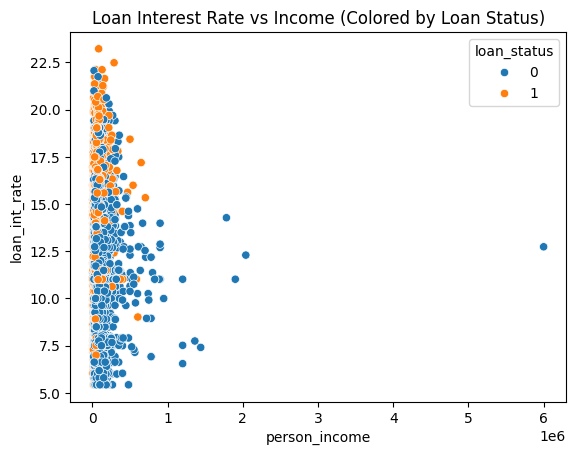

In [52]:
sns.scatterplot(x='person_income', y='loan_int_rate', hue='loan_status', data=data)
plt.title('Loan Interest Rate vs Income (Colored by Loan Status)')
plt.show()


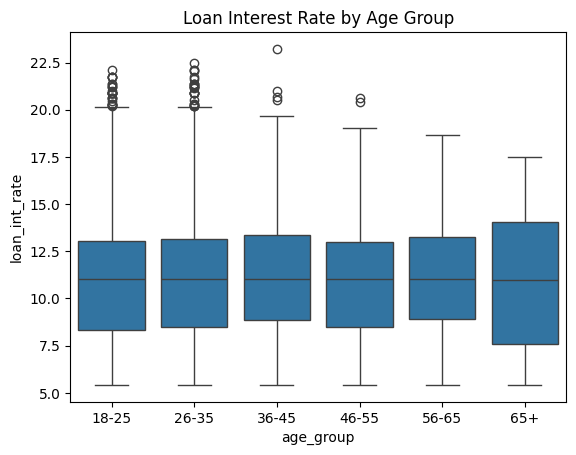

In [53]:
# Define age groups
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
data['age_group'] = pd.cut(data['person_age'], bins=bins, labels=labels)

# Boxplot for loan interest rate by age group
sns.boxplot(x='age_group', y='loan_int_rate', data=data)
plt.title('Loan Interest Rate by Age Group')
plt.show()
